In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv')
df = df.set_index('hn')
df.head()

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Data Preprocessing**

In [14]:
df

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,4.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,2.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,1.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(1723, 23)

In [15]:
df.isnull().sum(axis=0)

age             0
parity          0
hiv             4
menopaus        1
disease         0
surgery         0
conization      5
OPDsize        17
appearance    101
stage          24
pchemo          1
Wardsize      145
finalhisto     10
nodeyiel       12
RHlvsi        366
depth         489
size          114
utmet          98
vgmargin       96
vgmet          97
pelvicme        1
pmmet          94
adnmet          7
dtype: int64

In [20]:
df_clean_column = df.drop(['appearance','Wardsize','RHlvsi','depth','size','nodeyiel','vgmargin','pelvicme','adnmet'],axis=1) 
df_clean_column.isnull().sum(axis=0)

age            0
parity         0
hiv            4
menopaus       1
disease        0
surgery        0
conization     5
OPDsize       17
stage         24
pchemo         1
finalhisto    10
utmet         98
vgmet         97
pmmet         94
dtype: int64

In [21]:
df_clean = df_clean_column.dropna(axis=0)
df_clean.isnull().sum(axis=0)

age           0
parity        0
hiv           0
menopaus      0
disease       0
surgery       0
conization    0
OPDsize       0
stage         0
pchemo        0
finalhisto    0
utmet         0
vgmet         0
pmmet         0
dtype: int64

In [22]:
df_clean.shape

(1571, 14)

In [24]:
df_clean

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,stage,pchemo,finalhisto,utmet,vgmet,pmmet
hn,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,5.0,0.0,3.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,5.0,0.0,1.0,0.0,0.0,0.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,5.0,0.0,4.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,4.0,0.0,3.0,0.0,0.0,0.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,47,2,0.0,0.0,0,0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0
3167041,39,1,0.0,0.0,0,0,1.0,0.0,2.0,0.0,5.0,0.0,0.0,0.0
2623351,46,2,0.0,0.0,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [25]:
df_pm = df_clean['pmmet'].unique()
df_pm
#ทำนาย pmmmet

array([0., 1.])

In [26]:
pm_group =  [sum(df_clean['pmmet']==df_pm[0]), #index 0
             sum(df_clean['pmmet']==df_pm[1])] #index 1
pm_group

[1291, 280]

In [28]:
y = df_clean['pmmet'].values 
X = df_clean.drop(['pmmet'],axis = 1).values 

In [29]:
X.shape

(1571, 13)

In [30]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
X_train.shape

(1256, 13)

In [32]:
y_train.shape

(1256,)

In [33]:
X_test.shape

(315, 13)

In [34]:
y_test.shape

(315,)

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaler.fit(X_train) 
X_train_norm = scaler.transform(X_train) 
X_test_norm = scaler.transform(X_test)

In [36]:
X_train

array([[33.,  3.,  0., ...,  4.,  0.,  0.],
       [30.,  1.,  0., ...,  2.,  0.,  1.],
       [30.,  0.,  0., ...,  2.,  0.,  0.],
       ...,
       [61.,  2.,  0., ...,  2.,  0.,  0.],
       [60.,  2.,  0., ...,  1.,  0.,  0.],
       [37.,  0.,  0., ...,  1.,  1.,  0.]])

In [37]:
X_train_norm

array([[0.17460317, 0.23076923, 0.        , ..., 0.75      , 0.        ,
        0.        ],
       [0.12698413, 0.07692308, 0.        , ..., 0.25      , 0.        ,
        0.5       ],
       [0.12698413, 0.        , 0.        , ..., 0.25      , 0.        ,
        0.        ],
       ...,
       [0.61904762, 0.15384615, 0.        , ..., 0.25      , 0.        ,
        0.        ],
       [0.6031746 , 0.15384615, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.23809524, 0.        , 0.        , ..., 0.        , 0.5       ,
        0.        ]])

In [38]:
np.min(X_train_norm, axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
np.min(X_test_norm, axis=0) 

array([0.06349206, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

# **Logistic Regression**

**Trainning clf**

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [41]:
params = {'C': [2,4,6,8,10,12,14,16]} 
clf = GridSearchCV(LogisticRegression(random_state=0, solver='liblinear'),params, cv=10) 
clf.fit(X_train_norm, y_train) 

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid={'C': [2, 4, 6, 8, 10, 12, 14, 16]})

In [42]:
print("Best params : " +str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best params : {'C': 2}
10CV accuracy : 81.29142857142858


**Testing**

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [44]:
y_predict = clf.predict(X_test_norm) #label ของ test
y_predict

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [45]:
100*sum(y_test == y_predict)/len(y_test)

87.3015873015873

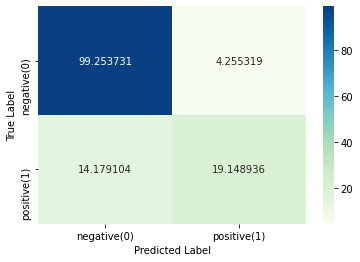

In [46]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative(0)', 'positive(1)']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [47]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

 negative(0)       0.88      0.99      0.93       268
 positive(1)       0.82      0.19      0.31        47

    accuracy                           0.87       315
   macro avg       0.85      0.59      0.62       315
weighted avg       0.87      0.87      0.84       315



# Support Vector Machine

**Training clf**

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [49]:
params = { 'C': [3,6,9,21,27,81,243], 
           'gamma': [0.1,0.2,0.3,0.4,1]  
         }
clf = GridSearchCV(SVC(),params,cv=10) 
clf.fit(X_train_norm, y_train) 

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [3, 6, 9, 21, 27, 81, 243],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 1]})

In [50]:
print("Best param : "+str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best param : {'C': 81, 'gamma': 0.2}
10CV accuracy : 81.92825396825396


**Testing**

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [53]:
y_predict = clf.predict(X_test_norm)
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

Test accuracy : 83.17460317460318


**Visualization**

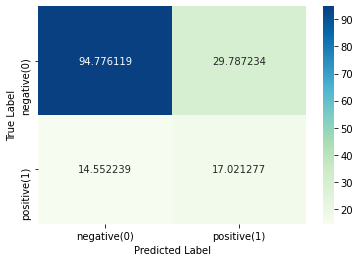

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative(0)', 'positive(1)']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [55]:
print(classification_report(y_test,y_predict,target_names=target_names))

              precision    recall  f1-score   support

 negative(0)       0.87      0.95      0.91       268
 positive(1)       0.36      0.17      0.23        47

    accuracy                           0.83       315
   macro avg       0.62      0.56      0.57       315
weighted avg       0.79      0.83      0.81       315

